# Diseño Experimentos Clase jul/9

In [1]:
k <- 4
X <- matrix(0,2^k,k)
X[,1] <- rep(c(rep(-1,1),rep(1,1)),2^(k-1))
for(i in 1:(k-1)){
  X[,i+1] <- rep(c(rep(-1,2^i),rep(1,2^i)),  2^(k-1 - i))
}
colnames(X) <- LETTERS[1:k]
X <- as.data.frame(X)
print(X)

    A  B  C  D
1  -1 -1 -1 -1
2   1 -1 -1 -1
3  -1  1 -1 -1
4   1  1 -1 -1
5  -1 -1  1 -1
6   1 -1  1 -1
7  -1  1  1 -1
8   1  1  1 -1
9  -1 -1 -1  1
10  1 -1 -1  1
11 -1  1 -1  1
12  1  1 -1  1
13 -1 -1  1  1
14  1 -1  1  1
15 -1  1  1  1
16  1  1  1  1


In [2]:
y <- c(45,71,48,65,68,60,80,65,43,100,45,104,75,86,70,96)
fit <- lm(y ~ 1 + A*B*C*D, data=X)
Xx <- model.matrix(fit)
colnames(Xx) <- gsub(":","",colnames(Xx))
print(Xx)

   (Intercept)  A  B  C  D AB AC BC AD BD CD ABC ABD ACD BCD ABCD
1            1 -1 -1 -1 -1  1  1  1  1  1  1  -1  -1  -1  -1    1
2            1  1 -1 -1 -1 -1 -1  1 -1  1  1   1   1   1  -1   -1
3            1 -1  1 -1 -1 -1  1 -1  1 -1  1   1   1  -1   1   -1
4            1  1  1 -1 -1  1 -1 -1 -1 -1  1  -1  -1   1   1    1
5            1 -1 -1  1 -1  1 -1 -1  1  1 -1   1  -1   1   1   -1
6            1  1 -1  1 -1 -1  1 -1 -1  1 -1  -1   1  -1   1    1
7            1 -1  1  1 -1 -1 -1  1  1 -1 -1  -1   1   1  -1    1
8            1  1  1  1 -1  1  1  1 -1 -1 -1   1  -1  -1  -1   -1
9            1 -1 -1 -1  1  1  1  1 -1 -1 -1  -1   1   1   1   -1
10           1  1 -1 -1  1 -1 -1  1  1 -1 -1   1  -1  -1   1    1
11           1 -1  1 -1  1 -1  1 -1 -1  1 -1   1  -1   1  -1    1
12           1  1  1 -1  1  1 -1 -1  1  1 -1  -1   1  -1  -1   -1
13           1 -1 -1  1  1  1 -1 -1 -1 -1  1   1   1  -1  -1    1
14           1  1 -1  1  1 -1  1 -1  1 -1  1  -1  -1   1  -1   -1
15        

integer(0)

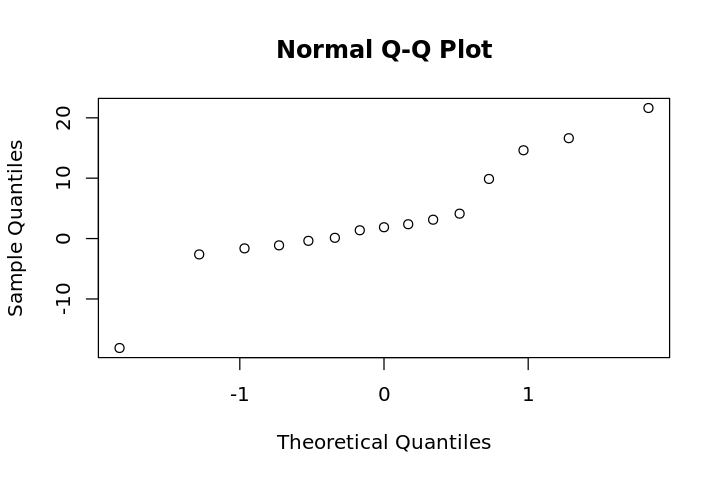

In [3]:
efectos <- 2*fit$coef[2:16]
xx <- colnames(Xx)[2:16]
# grafico normal de probabilidades
options(repr.plot.width=6, repr.plot.height=4)
grafico <- qqnorm(efectos)
identify(grafico$x,grafico$y,n=5,labels=xx)


Call:
lm(formula = y ~ A + C + D + A * C + A * D, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3750 -1.5000  0.0625  2.9062  5.7500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   70.062      1.104  63.444 2.30e-14 ***
A             10.812      1.104   9.791 1.93e-06 ***
C              4.938      1.104   4.471   0.0012 ** 
D              7.313      1.104   6.622 5.92e-05 ***
A:C           -9.063      1.104  -8.206 9.41e-06 ***
A:D            8.312      1.104   7.527 2.00e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.417 on 10 degrees of freedom
Multiple R-squared:  0.966,	Adjusted R-squared:  0.9489 
F-statistic: 56.74 on 5 and 10 DF,  p-value: 5.14e-07


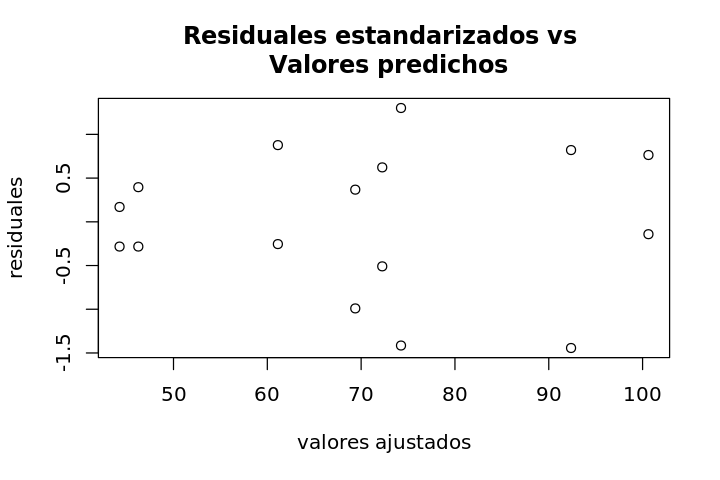

In [4]:
fit2 <- lm(y ~ A+C+D+A*C+A*D, data=X)
summary(fit2)

X.res <- resid(fit2)
respad <- X.res/sqrt(sum(X.res^2)/fit2$df.res)
plot(fitted(fit2), respad, xlab = "valores ajustados", ylab = "residuales")
title("Residuales estandarizados vs \n Valores predichos")
#title("Residuales estandarizados")

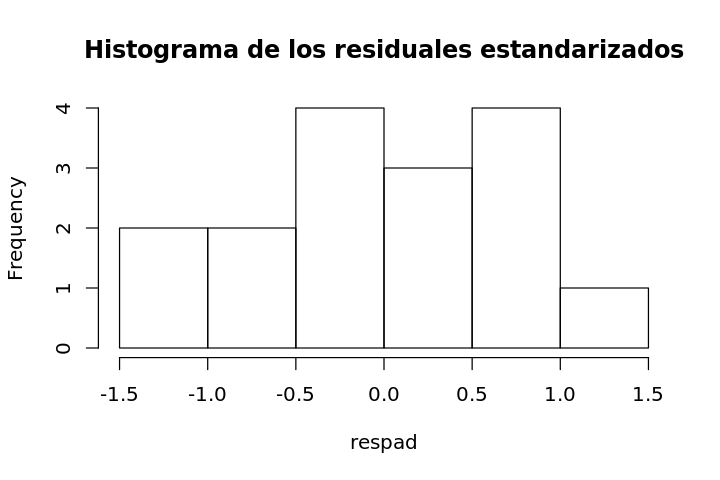

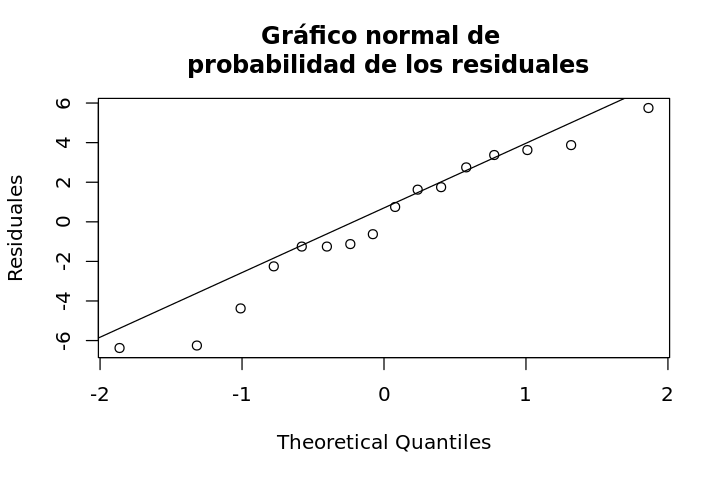

In [5]:
hist(respad, main = "Histograma de los residuales estandarizados")
qqnorm(X.res, ylab = "Residuales", main = NULL)
qqline(X.res)
title("Gráfico normal de \n probabilidad de los residuales")

In [6]:
### test de normalidad
shapiro.test(X.res)



	Shapiro-Wilk normality test

data:  X.res
W = 0.95347, p-value = 0.5466
